In [ ]:
import pandas as pd
import datetime
import re

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
upload = files.upload()

Saving dftweets_final1.csv to dftweets_final1.csv


In [ ]:
df_tweets = pd.read_csv(r"dftweets_final1.csv")

In [ ]:
df_tweets = df_tweets.drop('Unnamed: 0',axis=1)

In [ ]:
df_tweets

,Tweet,Date
0,#intradaytrading #Nifty #BANKNIFTY #optiontrad...,2022-09-03 23:58:08+00:00
1,78K+ on Thursday Expiry. Carried #nifty50 Puts...,2022-09-03 21:20:50+00:00
2,STOCK TO WATCH\nHINDALCO\nin range \nEDUCATION...,2022-09-03 21:20:08+00:00
3,GRASIM INDUSTRIES\nReady to BREAKOUT\nWith Vol...,2022-09-03 21:12:35+00:00
4,People were avoiding Adani companies for over-...,2022-09-03 20:54:09+00:00
...,...,...
10346,"#Sensex, #Nifty50 end 1st trading day of the y...",2017-01-02 12:43:25+00:00
10347,#India stocks were lower after the close on Mo...,2017-01-02 12:19:38+00:00
10348,"#SENSEX SHEDS 150 POINTS; #NIFTY50 BELOW 8,150...",2017-01-02 06:30:54+00:00
10349,"#Sensex sheds 150 points; #Nifty50 below 8,150...",2017-01-02 05:52:43+00:00


In [ ]:
df_tweets.dtypes

Tweet    object
Date     object
dtype: object

In [ ]:
df_tweets['Date'] = pd.to_datetime(df_tweets['Date'], errors='coerce').dt.strftime('%Y-%m-%d')

In [ ]:
df_tweets.drop_duplicates(inplace=True)

In [ ]:
df_tweets.reset_index(drop=True, inplace=True)

In [ ]:
df_tweets

,Tweet,Date
0,#intradaytrading #Nifty #BANKNIFTY #optiontrad...,2022-09-03
1,78K+ on Thursday Expiry. Carried #nifty50 Puts...,2022-09-03
2,STOCK TO WATCH\nHINDALCO\nin range \nEDUCATION...,2022-09-03
3,GRASIM INDUSTRIES\nReady to BREAKOUT\nWith Vol...,2022-09-03
4,People were avoiding Adani companies for over-...,2022-09-03
...,...,...
10183,"#Sensex, #Nifty50 end 1st trading day of the y...",2017-01-02
10184,#India stocks were lower after the close on Mo...,2017-01-02
10185,"#SENSEX SHEDS 150 POINTS; #NIFTY50 BELOW 8,150...",2017-01-02
10186,"#Sensex sheds 150 points; #Nifty50 below 8,150...",2017-01-02


In [ ]:
df_tweets.dropna(inplace=True)

In [ ]:
df_tweets.reset_index(drop=True,inplace=True)

In [ ]:
df_tweets.isnull().sum()

Tweet    0
Date     0
dtype: int64

In [ ]:
df_tweets

,Tweet,Date
0,#intradaytrading #Nifty #BANKNIFTY #optiontrad...,2022-09-03
1,78K+ on Thursday Expiry. Carried #nifty50 Puts...,2022-09-03
2,STOCK TO WATCH\nHINDALCO\nin range \nEDUCATION...,2022-09-03
3,GRASIM INDUSTRIES\nReady to BREAKOUT\nWith Vol...,2022-09-03
4,People were avoiding Adani companies for over-...,2022-09-03
...,...,...
10181,"#Sensex, #Nifty50 end 1st trading day of the y...",2017-01-02
10182,#India stocks were lower after the close on Mo...,2017-01-02
10183,"#SENSEX SHEDS 150 POINTS; #NIFTY50 BELOW 8,150...",2017-01-02
10184,"#Sensex sheds 150 points; #Nifty50 below 8,150...",2017-01-02


In [ ]:
df_tweets['Tweet'][9063]

'Happy trading \n#Nifty #NIFTYFUTURE #nifty50 #sensex #CrudeOil #naturalgas #gold #BSE #NSE #sensex #BREAKING for more call/whatup 7976397986 https://t.co/jTLa59sXD1'

In [ ]:
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
def process_tweets(tweet):
  tweet.replace('[^\w\s]', '') # removing punctuations
  tweet = re.sub(r'@[A-Za-z0-9]+','',tweet) #removing @ user tags
  tweet = re.sub(r'https?:\/\/\S+','',tweet) #removing links
  tweet = " ".join(word for word in tweet.split() if word not in stop_words) #removing stopwords
  tweet = " ".join(Word(word).lemmatize() for word in tweet.split()) # Converting words to their basic form
  return tweet

In [ ]:
df_tweets['Processed_tweets'] = df_tweets['Tweet'].apply(lambda x: process_tweets(x))

In [ ]:
df_tweets.head(20)

,Tweet,Date,Processed_tweets
0,#intradaytrading #Nifty #BANKNIFTY #optiontrad...,2022-09-03,#intradaytrading #Nifty #BANKNIFTY #optiontrad...
1,78K+ on Thursday Expiry. Carried #nifty50 Puts...,2022-09-03,78K+ Thursday Expiry. Carried #nifty50 Puts ga...
2,STOCK TO WATCH\nHINDALCO\nin range \nEDUCATION...,2022-09-03,STOCK TO WATCH HINDALCO range EDUCATIONAL PURP...
3,GRASIM INDUSTRIES\nReady to BREAKOUT\nWith Vol...,2022-09-03,GRASIM INDUSTRIES Ready BREAKOUT With Volumes ...
4,People were avoiding Adani companies for over-...,2022-09-03,"People avoiding Adani company over- valuation,..."
5,Opening vs closing #dow #tradingmotivation \n\...,2022-09-02,Opening v closing #dow #tradingmotivation Mark...
6,#nifty50 #stocks \nMacroeconomics heads\nChopp...,2022-09-02,#nifty50 #stocks Macroeconomics head Choppines...
7,#dowjones is at crucial support level of 31150...,2022-09-02,#dowjones crucial support level 31150-300 .. I...
8,Dow Jones down by 3000 points in last 2 weeks ...,2022-09-02,Dow Jones 3000 point last 2 week Nifty 400 poi...
9,#stockmarketcrash\nThis shit #Dowjones is gonn...,2022-09-02,#stockmarketcrash This shit #Dowjones gonna ma...


In [ ]:
df_tweets['polarity'] = df_tweets['Processed_tweets'].apply(lambda x: TextBlob(x).sentiment[0])
df_tweets['subjectivity'] = df_tweets['Processed_tweets'].apply(lambda x: TextBlob(x).sentiment[1])

In [ ]:
df_tweets

,Tweet,Date,Processed_tweets,polarity,subjectivity
0,#intradaytrading #Nifty #BANKNIFTY #optiontrad...,2022-09-03,#intradaytrading #Nifty #BANKNIFTY #optiontrad...,0.000000,0.000
1,78K+ on Thursday Expiry. Carried #nifty50 Puts...,2022-09-03,78K+ Thursday Expiry. Carried #nifty50 Puts ga...,0.000000,0.000
2,STOCK TO WATCH\nHINDALCO\nin range \nEDUCATION...,2022-09-03,STOCK TO WATCH HINDALCO range EDUCATIONAL PURP...,0.125000,0.625
3,GRASIM INDUSTRIES\nReady to BREAKOUT\nWith Vol...,2022-09-03,GRASIM INDUSTRIES Ready BREAKOUT With Volumes ...,0.225000,0.375
4,People were avoiding Adani companies for over-...,2022-09-03,"People avoiding Adani company over- valuation,...",0.000000,0.000
...,...,...,...,...,...
10181,"#Sensex, #Nifty50 end 1st trading day of the y...",2017-01-02,"#Sensex, #Nifty50 end 1st trading day year red...",0.100000,0.100
10182,#India stocks were lower after the close on Mo...,2017-01-02,"#India stock lower close Monday, loss Banking,...",0.000000,0.000
10183,"#SENSEX SHEDS 150 POINTS; #NIFTY50 BELOW 8,150...",2017-01-02,"#SENSEX SHEDS 150 POINTS; #NIFTY50 BELOW 8,150...",0.000000,0.000
10184,"#Sensex sheds 150 points; #Nifty50 below 8,150...",2017-01-02,"#Sensex shed 150 points; #Nifty50 8,150. Live:",0.136364,0.500


In [ ]:
from wordcloud import WordCloud

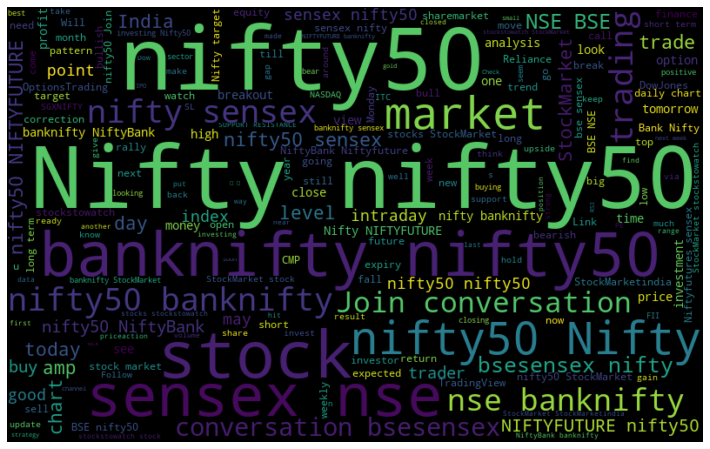

In [ ]:
tweet_words = " ".join([sentence for sentence in df_tweets['Processed_tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(tweet_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def classify_tweets(polarity):
  if polarity < 0:
    return 'Negative'
  elif polarity > 0 :
    return 'Positive'
  else:
    return 'Neutral'

In [ ]:
df_tweets['Sentiment'] = df_tweets['polarity'].apply(classify_tweets)

In [ ]:
df_tweets

,Tweet,Date,Processed_tweets,polarity,subjectivity,Sentiment
0,#intradaytrading #Nifty #BANKNIFTY #optiontrad...,2022-09-03,#intradaytrading #Nifty #BANKNIFTY #optiontrad...,0.000000,0.000,Neutral
1,78K+ on Thursday Expiry. Carried #nifty50 Puts...,2022-09-03,78K+ Thursday Expiry. Carried #nifty50 Puts ga...,0.000000,0.000,Neutral
2,STOCK TO WATCH\nHINDALCO\nin range \nEDUCATION...,2022-09-03,STOCK TO WATCH HINDALCO range EDUCATIONAL PURP...,0.125000,0.625,Positive
3,GRASIM INDUSTRIES\nReady to BREAKOUT\nWith Vol...,2022-09-03,GRASIM INDUSTRIES Ready BREAKOUT With Volumes ...,0.225000,0.375,Positive
4,People were avoiding Adani companies for over-...,2022-09-03,"People avoiding Adani company over- valuation,...",0.000000,0.000,Neutral
...,...,...,...,...,...,...
10181,"#Sensex, #Nifty50 end 1st trading day of the y...",2017-01-02,"#Sensex, #Nifty50 end 1st trading day year red...",0.100000,0.100,Positive
10182,#India stocks were lower after the close on Mo...,2017-01-02,"#India stock lower close Monday, loss Banking,...",0.000000,0.000,Neutral
10183,"#SENSEX SHEDS 150 POINTS; #NIFTY50 BELOW 8,150...",2017-01-02,"#SENSEX SHEDS 150 POINTS; #NIFTY50 BELOW 8,150...",0.000000,0.000,Neutral
10184,"#Sensex sheds 150 points; #Nifty50 below 8,150...",2017-01-02,"#Sensex shed 150 points; #Nifty50 8,150. Live:",0.136364,0.500,Positive


In [ ]:
df_tweets['Sentiment'].value_counts()

Neutral     5480
Positive    3517
Negative    1189
Name: Sentiment, dtype: int64

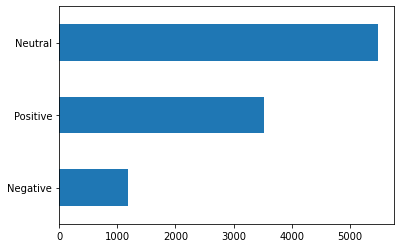

In [ ]:
df_tweets['Sentiment'].value_counts().sort_values().plot(kind = 'barh')

In [ ]:
df_tweets.head(50)

,Tweet,Date,Processed_tweets,polarity,subjectivity,Sentiment
0,#intradaytrading #Nifty #BANKNIFTY #optiontrad...,2022-09-03,#intradaytrading #Nifty #BANKNIFTY #optiontrad...,0.000000,0.000000,Neutral
1,78K+ on Thursday Expiry. Carried #nifty50 Puts...,2022-09-03,78K+ Thursday Expiry. Carried #nifty50 Puts ga...,0.000000,0.000000,Neutral
2,STOCK TO WATCH\nHINDALCO\nin range \nEDUCATION...,2022-09-03,STOCK TO WATCH HINDALCO range EDUCATIONAL PURP...,0.125000,0.625000,Positive
3,GRASIM INDUSTRIES\nReady to BREAKOUT\nWith Vol...,2022-09-03,GRASIM INDUSTRIES Ready BREAKOUT With Volumes ...,0.225000,0.375000,Positive
4,People were avoiding Adani companies for over-...,2022-09-03,"People avoiding Adani company over- valuation,...",0.000000,0.000000,Neutral
5,Opening vs closing #dow #tradingmotivation \n\...,2022-09-02,Opening v closing #dow #tradingmotivation Mark...,0.000000,0.250000,Neutral
6,#nifty50 #stocks \nMacroeconomics heads\nChopp...,2022-09-02,#nifty50 #stocks Macroeconomics head Choppines...,0.000000,0.000000,Neutral
7,#dowjones is at crucial support level of 31150...,2022-09-02,#dowjones crucial support level 31150-300 .. I...,-0.050909,0.598636,Negative
8,Dow Jones down by 3000 points in last 2 weeks ...,2022-09-02,Dow Jones 3000 point last 2 week Nifty 400 poi...,0.100000,0.133333,Positive
9,#stockmarketcrash\nThis shit #Dowjones is gonn...,2022-09-02,#stockmarketcrash This shit #Dowjones gonna ma...,-0.065909,0.438636,Negative


In [ ]:
df_tweets["daily_polarity"] = df_tweets.groupby("Date")["polarity"].transform("mean")

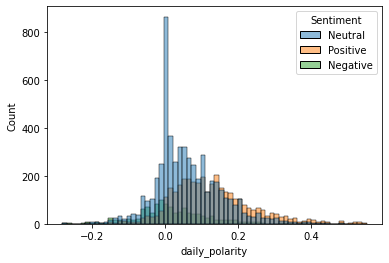

In [ ]:
sns.histplot(data=df_tweets,x='daily_polarity',hue='Sentiment')

In [ ]:
def daily_classify_tweets(dpolarity):
  if dpolarity < -0.08:
    return -1
  elif dpolarity > 0.15 :
    return 1
  else:
    return 0

In [ ]:
df_tweets['Daily_sentiment'] = df_tweets['daily_polarity'].apply(daily_classify_tweets)

In [ ]:
df_tweets.head()

,Tweet,Date,Processed_tweets,polarity,subjectivity,Sentiment,daily_polarity,Daily_sentiment
0,#intradaytrading #Nifty #BANKNIFTY #optiontrad...,2022-09-03,#intradaytrading #Nifty #BANKNIFTY #optiontrad...,0.000,0.000,Neutral,0.07,0
1,78K+ on Thursday Expiry. Carried #nifty50 Puts...,2022-09-03,78K+ Thursday Expiry. Carried #nifty50 Puts ga...,0.000,0.000,Neutral,0.07,0
2,STOCK TO WATCH\nHINDALCO\nin range \nEDUCATION...,2022-09-03,STOCK TO WATCH HINDALCO range EDUCATIONAL PURP...,0.125,0.625,Positive,0.07,0
3,GRASIM INDUSTRIES\nReady to BREAKOUT\nWith Vol...,2022-09-03,GRASIM INDUSTRIES Ready BREAKOUT With Volumes ...,0.225,0.375,Positive,0.07,0
4,People were avoiding Adani companies for over-...,2022-09-03,"People avoiding Adani company over- valuation,...",0.000,0.000,Neutral,0.07,0


In [ ]:
df_tweets['Daily_sentiment'].value_counts()

 0    7610
 1    2191
-1     385
Name: Daily_sentiment, dtype: int64

In [ ]:
df_tweets = df_tweets.drop('Tweet',axis=1)

In [ ]:
df_tweets = df_tweets.drop('Processed_tweets',axis=1)
df_tweets = df_tweets.drop('polarity',axis=1)
df_tweets = df_tweets.drop('subjectivity',axis=1)
df_tweets = df_tweets.drop('Sentiment',axis=1)
df_tweets = df_tweets.drop('daily_polarity',axis=1)

In [ ]:
df_tweets

,Date,Daily_sentiment
0,2022-09-03,0
1,2022-09-03,0
2,2022-09-03,0
3,2022-09-03,0
4,2022-09-03,0
...,...,...
10181,2017-01-02,0
10182,2017-01-02,0
10183,2017-01-02,0
10184,2017-01-02,0


In [ ]:
df_tweets.drop_duplicates(inplace=True)

In [ ]:
df_tweets

,Date,Daily_sentiment
0,2022-09-03,0
5,2022-09-02,0
10,2022-09-01,0
15,2022-08-31,0
20,2022-08-30,0
...,...,...
10161,2017-01-06,0
10166,2017-01-05,1
10171,2017-01-04,0
10176,2017-01-03,1


In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
df_tweets.to_csv('dftweets_sentiment.csv', sep='\t', encoding='utf-8')
!cp dftweets_sentiment.csv "drive/My Drive/"